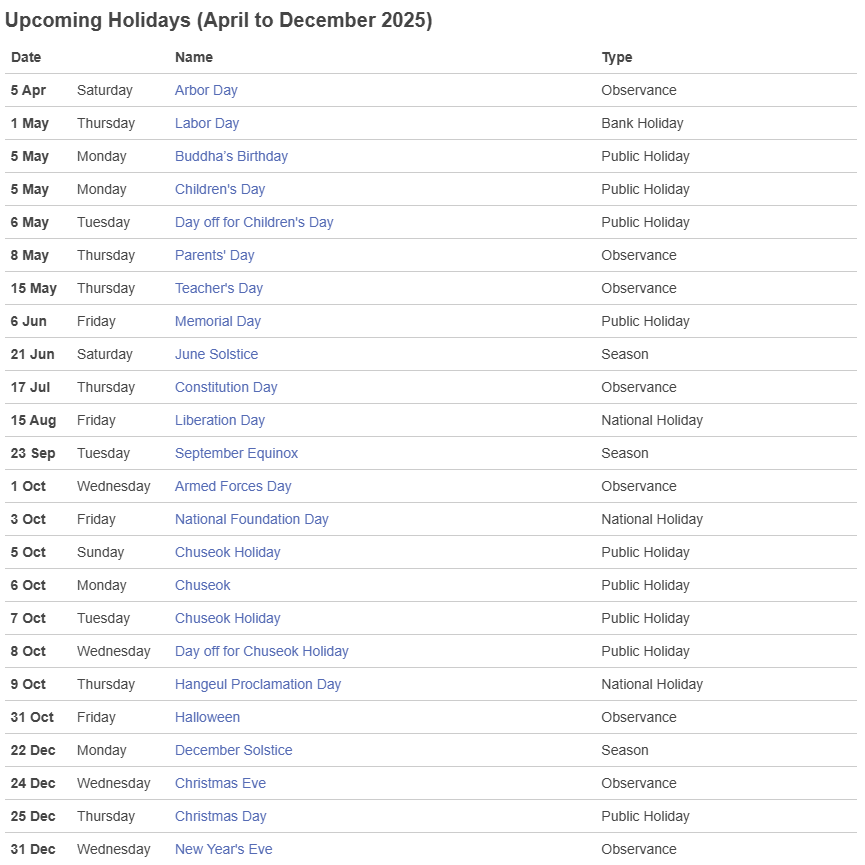

In [ ]:
import bs4, requests
import pandas as pd

try:
    # 웹 크롤링할 사이트 주소
    targetUrl = "https://www.timeanddate.com/holidays/south-korea/"

    resp = requests.get(url = targetUrl)

    if resp.status_code == 200:
        print("Connect Success!!")
    else:
        print("Connect Fail..")

    # utf-8로 인코딩
    resp.encoding = "utf-8"

    htmlObj = resp.text
    # htmlObj

    bsObj = bs4.BeautifulSoup(htmlObj, "html.parser")
    # bsObj

    # 제목 들고와서 제대로 나오는지 확인
    title = bsObj.find(name="h2", attrs={"id":"holidays"}).text
    # print(title)

    # 전체 데이터 저장 리스트
    allList = []

    # 컬럼명 저장 리스트
    columnList = []

    # 크롤링한 데이터 저장할 리스트
    dateList = [] #  날짜
    weekDayList = [] # 요일
    nameList = [] # 휴일명
    typeList = [] # 휴일 타입

    # 전체 데이터가 담긴 테이블 부분 찾기
    tableData = bsObj.find(name="table", attrs={"id":"holidays-table"})

    # 컬럼명 처리해서 columnList에 넣음
    theadTags = tableData.find(name="thead")
    theadList = theadTags.find_all(name="th")
    for i in range(len(theadList)):
        columnName = theadList[i].text
        if columnName == '\xa0':
            columnName = "week_info"
        elif columnName == 'Name':
            columnName = 'holiday_name'
        elif columnName[0].isupper():
            columnName = columnName.lower()
        columnList.append(columnName)
    # print(columnList)

    # 밑으로는 테이블 데이터 처리하는 부분
    tbodyTags = tableData.find(name="tbody")
    tbodyData = tbodyTags.find_all(name="tr")
    # print(tbodyData)

    tbodyTagsDateList = tbodyTags.find_all(name="th")
    # print(tbodyTagsDateList[0].text)
    for i in range (0, len(tbodyTagsDateList)):
        holidayDate = tbodyTagsDateList[i].text
        dateList.append(holidayDate)
    # print(dateList)

    tbodyTagsTdList = tbodyTags.find_all(name="td")
    # print(tbodyTagsTdList)

    for i in range(0, int(len(tbodyTagsTdList))):
        if (i+1)%3 ==1:
            tbodyDay = tbodyTagsTdList[i].text
            weekDayList.append(tbodyDay)
        elif (i+1)%3 == 2:
            tbodyName = tbodyTagsTdList[i].text
            nameList.append(tbodyName)
        elif (i+1) %3 == 0:
            tbodyType = tbodyTagsTdList[i].text
            typeList.append(tbodyType)

    for i in range(0, len(dateList)):
        rowList = [dateList[i], weekDayList[i], nameList[i], typeList[i]]
        allList.append(rowList)

except Exception as e:
    print(str(e))

pd.DataFrame(allList, columns=columnList)

Connect Success!!


,date,week_info,holiday_name,type
0,5 Apr,Saturday,Arbor Day,Observance
1,1 May,Thursday,Labor Day,Bank Holiday
2,5 May,Monday,Buddha’s Birthday,Public Holiday
3,5 May,Monday,Children's Day,Public Holiday
4,6 May,Tuesday,Day off for Children's Day,Public Holiday
5,8 May,Thursday,Parents' Day,Observance
6,15 May,Thursday,Teacher's Day,Observance
7,6 Jun,Friday,Memorial Day,Public Holiday
8,21 Jun,Saturday,June Solstice,Season
9,17 Jul,Thursday,Constitution Day,Observance
